In [21]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn import datasets, model_selection
# from tensorflow.keras.backend import one_hot
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
mnist = input_data.read_data_sets('MNIST_data',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
mnist.train.images.shape

(55000, 784)

In [4]:
x_train = mnist.train.images
x_test = mnist.test.images
y_train = mnist.train.labels
y_test = mnist.test.labels

In [5]:
x_train.shape

(55000, 784)

In [6]:
x = tf.placeholder( tf.float32, [None,784])
y = tf.constant(y_train,tf.float32)

In [7]:
# w1 = tf.Variable( tf.random_uniform([784,50]))
# b1 = tf.Variable( tf.random_uniform([50]))

# w6 = tf.Variable( tf.random_uniform([50,10]))
# b6 = tf.Variable( tf.random_uniform([10]))

In [9]:
# xavier initializer
w1 = tf.get_variable('w1',[784,50],initializer = tf.contrib.layers.xavier_initializer())
b1 = tf.get_variable('b1',[50],initializer = tf.contrib.layers.xavier_initializer())
w6 = tf.get_variable('w6',[50,10],initializer = tf.contrib.layers.xavier_initializer())
b6 = tf.get_variable('b6',[10],initializer = tf.contrib.layers.xavier_initializer())

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [10]:
z1 = tf.matmul(x,w1) + b1
lay1 = tf.nn.relu(z1)

z6 = tf.matmul(lay1,w6) + b6
hx = tf.nn.softmax(z6)

In [11]:
cost_i = tf.nn.softmax_cross_entropy_with_logits_v2(logits = z6 , labels =y)
cost = tf.reduce_mean(cost_i)

In [12]:
optimizer = tf.train.AdamOptimizer(0.1)
train = optimizer.minimize(cost)
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [13]:
for i in range(1001):
    sess.run(train,{x:x_train})
    c = sess.run(cost,{x:x_train})
    print(i,c)

0 9.897815
1 8.276289
2 6.9856396
3 5.3471603
4 2.9390495
5 2.186471
6 1.418531
7 1.29143
8 1.2928723
9 1.266951
10 1.2228423
11 1.1499733
12 1.0807854
13 1.0396916
14 1.0203457
15 0.98636013
16 0.93494886
17 0.881138
18 0.8279688
19 0.78564
20 0.7493545
21 0.7164638
22 0.68580395
23 0.6562814
24 0.6317172
25 0.6034114
26 0.5827852
27 0.5673781
28 0.5505945
29 0.5350736
30 0.5191469
31 0.5042572
32 0.4993206
33 0.48871747
34 0.4746309
35 0.4640422
36 0.45425484
37 0.4447262
38 0.43466148
39 0.42687184
40 0.42029646
41 0.41268954
42 0.40423813
43 0.3959571
44 0.38983697
45 0.38380972
46 0.3782043
47 0.37134686
48 0.36576635
49 0.35995054
50 0.35485813
51 0.3495859
52 0.34473225
53 0.34030735
54 0.33566543
55 0.33090934
56 0.32628942
57 0.3223553
58 0.31826878
59 0.31469604
60 0.31085175
61 0.3069241
62 0.30352247
63 0.30022147
64 0.29705846
65 0.29381153
66 0.2906882
67 0.2876179
68 0.28484944
69 0.28183696
70 0.2790763
71 0.27642018
72 0.27358595
73 0.27096975
74 0.26819855
75 0.265642

In [14]:
x_test[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

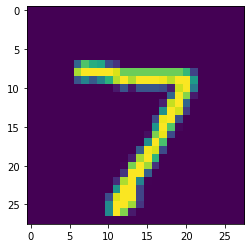

In [15]:
plt.imshow(x_test[0].reshape(28,28))
plt.show()

In [16]:
sess.run(hx, {x:[x_test[0]]})

array([[3.92078634e-20, 5.37526335e-09, 6.62777637e-08, 2.69198743e-08,
        6.55855162e-11, 4.31843276e-11, 7.13574070e-27, 9.99999881e-01,
        1.01733615e-10, 7.53615126e-09]], dtype=float32)

In [17]:
sess.run(hx, {x:[x_test[0]]}).argmax(axis=1)

array([7], dtype=int64)

In [18]:
t = sess.run(hx,{x:x_test})

result = t.argmax(axis =1)

val = y_test.argmax(axis=1)

In [19]:
(result == val).mean()

0.9439

# Keras

In [34]:
model = Sequential()
model.add(Dense(units =50 , input_dim=784 ,activation = 'softmax'))
model.add(Dense(units =10 , input_dim=50 ,activation = 'softmax')) #layer 추가

In [36]:
model.compile(loss = 'categorical_crossentropy', optimizer = "Adam" ,metrics = ['accuracy'])  #optimizer = "adam" 으로 설정하면 xavier 초기화
h= model.fit(x_train,y_train,epochs=100)

Train on 55000 samples
Epoch 1/100
55000/55000 [==============================] - 2s 34us/sample - loss: 1.3042 - acc: 0.7275
Epoch 2/100
55000/55000 [==============================] - 2s 32us/sample - loss: 0.6833 - acc: 0.7648
Epoch 3/100
55000/55000 [==============================] - 2s 34us/sample - loss: 0.5720 - acc: 0.7717
Epoch 4/100
55000/55000 [==============================] - 2s 33us/sample - loss: 0.5296 - acc: 0.7905
Epoch 5/100
55000/55000 [==============================] - 2s 32us/sample - loss: 0.4464 - acc: 0.8515
Epoch 6/100
55000/55000 [==============================] - 2s 37us/sample - loss: 0.3398 - acc: 0.9127
Epoch 7/100
55000/55000 [==============================] - 2s 35us/sample - loss: 0.2622 - acc: 0.9355
Epoch 8/100
55000/55000 [==============================] - 2s 32us/sample - loss: 0.2379 - acc: 0.9392
Epoch 9/100
55000/55000 [==============================] - 2s 32us/sample - loss: 0.2252 - acc: 0.9419
Epoch 10/100
55000/55000 [========================

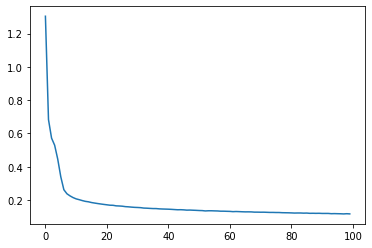

In [37]:
plt.plot(h.history['loss'])
plt.show()

In [38]:
h.history['acc'][-1]

0.9689636